### Text Preprocessing steps
1. Removing punctuations like ..!$()*@
2. Removing URLs
3. Removing stopwords
4. Lower casing
5. Remove stopwords: Stopwords are the most commonly occuring words in a text which do not provide any valuable information. stopwords like they, there, this, where etc are some exa. of stopwords.
6. Tokenization: Tokenization sepeartes text into units such as sententes or words.
7. Stemming: Refers to the process of slicing the end or beginning of words with the intention of removing affixes. It removes suffices like "ing","ly","s",etc. by a simple rule based approach. It reduces the corpus of words but often actual words get neglected e.g. Entitling, Entitled-->Entitl.
8. Lemmatization: the objective of reducing a word to its base form and grouping together different forms of the same word. For example the words "running","runs",and "ran" are still forms of the word "run", so "run" is the lemma of all the previous words.

In [1]:
#!pip install spacy

In [2]:
 #!python -m spacy download en_core_web_md

### Let's build Amazon scrapper

In [3]:
#!python -m pip install wordcloud

In [9]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [5]:
url='https://www.amazon.in/Notebook-Resolution-i5-11300H-15-6-inch-Fingerprint/dp/B098XLXDRS/ref=sr_1_5?pf_rd_i=1375424031&pf_rd_m=A1K21FY43GMZF8&pf_rd_p=3ed8cb2e-57dd-4566-bd48-e824450b996a&pf_rd_r=VP700XP0FKE491SM4AXN&pf_rd_s=merchandised-search-9&pf_rd_t=101&qid=1672902655&sr=8-5&th=1'
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400'
}

In [12]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [13]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [14]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [16]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Notebook-Resolution-i5-11300H-15-6-inch-Fingerprint/dp/B098XLXDRS/ref=sr_1_5?pf_rd_i=1375424031&pf_rd_m=A1K21FY43GMZF8&pf_rd_p=3ed8cb2e-57dd-4566-bd48-e824450b996a&pf_rd_r=VP700XP0FKE491SM4AXN&pf_rd_s=merchandised-search-9&pf_rd_t=101&qid=1672902655&sr=8-5&th=1')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\HP\AppData\Local\Temp\ipykernel_8124\2001359509.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [60]:
# Save results to a dataframe, then export as CSV
review_df = pd.DataFrame(reviewlist)
review_df

Rating                                              Title  \
0        4.0                        My Review on OnePlus Mobile   
1        4.0                Good phone-could have been better !   
2        4.0  This mobile is totally as same as i was expecting   
3        4.0              5g network doesn't work on this phone   
4        4.0                                    Phone is good..   
...      ...                                                ...   
9142     4.0  Good for Media consumption and day to day regu...   
9143     4.0                             About Bios and Display   
9144     4.0                                    Timely delivery   
9145     5.0                                   Very Good Laptop   
9146     5.0  Exceptional overall laptop with mediocre speak...   

                                                 Review  \
0     Pros......I am using OnePlus from last few mon...   
1     I've purchased the 6GB version of this phone w...   
2     Waw this is good mobile is under 20K. I have p...   
3     All are good in this phone but jio true 5g net...   
4                Phone is good and camera is excellent.   
...                                                 ...   
9142  The screen is absolutely gorgeous for Media co...   
9143  Bios is not good. You will face problems in Vi...   
9144  The laptop is class apart! Good aluminum build...   
9145                        Very nice laptop\nRead more   
9146  I just received this laptop earlier today. Got...   

                                    Review_Date  
0      Reviewed in India 🇮🇳 on 28 December 2022  
1      Reviewed in India 🇮🇳 on 19 December 2022  
2        Reviewed in India 🇮🇳 on 1 January 2023  
3        Reviewed in India 🇮🇳 on 3 January 2023  
4        Reviewed in India 🇮🇳 on 3 January 2023  
...                                         ...  
9142  Reviewed in India 🇮🇳 on 25 September 2022  
9143     Reviewed in India 🇮🇳 on 20 August 2022  
9144  Reviewed in India 🇮🇳 on 24 September 2022  
9145   Reviewed in India 🇮🇳 on 25 December 2022  
9146   Reviewed in India 🇮🇳 on 6 September 2021  

[9147 rows x 4 columns]

In [18]:
review_df.to_csv("D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/11_Text Mining/Amazon_Reviews_Mi_Notebook.csv")

In [ ]:
#pip install nltk

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import nltk
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
%matplotlib inline

In [ ]:
#!python -m spacy download en_core_web_md

In [ ]:
#### Remove empty cells

In [61]:
review_df = review_df[review_df['Review']!='']
review_df.drop(['Rating','Title','Review_Date'],inplace=True,axis=1)
review_df.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_8124\1837705452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df.drop(['Rating','Title','Review_Date'],inplace=True,axis=1)


Review
0  Pros......I am using OnePlus from last few mon...
1  I've purchased the 6GB version of this phone w...
2  Waw this is good mobile is under 20K. I have p...
3  All are good in this phone but jio true 5g net...
4             Phone is good and camera is excellent.
5               Good features in low price segments.
6  Battery back up is good. Sleek and light weigh...
7                                I love this product
8                                         It's goood
9  It was great product by oneplus in this price ...

### Number of STOPWORDS

In [62]:
## Importing stopwords from corpus
from nltk.corpus import stopwords
stop = stopwords.words('english')

review_df['stopwords'] = review_df['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop])) ### Te remove float error x is replaced with str(x)
review_df[['Review','stopwords']].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8124\788731243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['stopwords'] = review_df['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop])) ### Te remove float error x is replaced with str(x)


Review  stopwords
0  Pros......I am using OnePlus from last few mon...         86
1  I've purchased the 6GB version of this phone w...        128
2  Waw this is good mobile is under 20K. I have p...         19
3  All are good in this phone but jio true 5g net...          8
4             Phone is good and camera is excellent.          3

### Removing both leading and trailing characters and removing empty strings

In [63]:
review_df.drop(['stopwords'],inplace=True,axis=1)
review_df

C:\Users\HP\AppData\Local\Temp\ipykernel_8124\1059487560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df.drop(['stopwords'],inplace=True,axis=1)


Review
0     Pros......I am using OnePlus from last few mon...
1     I've purchased the 6GB version of this phone w...
2     Waw this is good mobile is under 20K. I have p...
3     All are good in this phone but jio true 5g net...
4                Phone is good and camera is excellent.
...                                                 ...
9142  The screen is absolutely gorgeous for Media co...
9143  Bios is not good. You will face problems in Vi...
9144  The laptop is class apart! Good aluminum build...
9145                        Very nice laptop\nRead more
9146  I just received this laptop earlier today. Got...

[9075 rows x 1 columns]

In [64]:
review_df['numerics'] = review_df['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
review_df[['Review','numerics']]

C:\Users\HP\AppData\Local\Temp\ipykernel_8124\2413444656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['numerics'] = review_df['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))


Review  numerics
0     Pros......I am using OnePlus from last few mon...         0
1     I've purchased the 6GB version of this phone w...         2
2     Waw this is good mobile is under 20K. I have p...         0
3     All are good in this phone but jio true 5g net...         0
4                Phone is good and camera is excellent.         0
...                                                 ...       ...
9142  The screen is absolutely gorgeous for Media co...         2
9143  Bios is not good. You will face problems in Vi...         0
9144  The laptop is class apart! Good aluminum build...         1
9145                        Very nice laptop\nRead more         0
9146  I just received this laptop earlier today. Got...         2

[9075 rows x 2 columns]

#### Removing Punctuations, Numbers and Special characters

In [65]:
import re
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [66]:
review_df['Review'] = review_df['Review'].apply(lambda x: clean_text(x))
review_df.head(10)
new_review_df=review_df.copy()

C:\Users\HP\AppData\Local\Temp\ipykernel_8124\4129556097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['Review'] = review_df['Review'].apply(lambda x: clean_text(x))


In [68]:
new_review_df

Review  numerics
0     prosi am using oneplus from last few months an...         0
1     ive purchased the  version of this phone which...         2
2     waw this is good mobile is under  i have purch...         0
3     all are good in this phone but jio true  netwo...         0
4                 phone is good and camera is excellent         0
...                                                 ...       ...
9142  the screen is absolutely gorgeous for media co...         2
9143  bios is not good you will face problems in vir...         0
9144  the laptop is class apart good aluminum build ...         1
9145                          very nice laptopread more         0
9146  i just received this laptop earlier today got ...         2

[9075 rows x 2 columns]

In [67]:

review_df = [Review.strip() for Review in review_df.Review] # remove both the leading and the trailing characters
review_df = [Review for Review in review_df if Review] # removes empty strings, because they are considered in Python as False
review_df

['prosi am using oneplus from last few months and my review for one plus phone is positive better than atleast realme and redmi or vivo and oppo or than poco or any other new models and  mp rare with  macro lens include with good flash light where as video on potrait mode is possible from dual side of both camerasit has very good camera quality surely starting from basic range only and in light it really clicks good photosvideography is also clear and goodi will rate  quality audio but no streao speakers but sound it produces is intense and goodi will give  is also good oxygen  now and touch is also very smooth and  doesnot generate heat though so fast if you continuously play games then  processor with  more ram extension  anyone  and  is a good combination though you can go for  of ram  user handy functions like battery symbols and widgets can be changed in multiple  a powerful phone with good battery backupconsno headphone is provided as one plus sale is huge now so they can afford 

In [42]:
# Joining the list into one string/text
text = ' '.join(review_df)
text

'prosi am using oneplus from last few months and my review for one plus phone is positive better than atleast realme and redmi or vivo and oppo or than poco or any other new models and  mp rare with  macro lens include with good flash light where as video on potrait mode is possible from dual side of both camerasit has very good camera quality surely starting from basic range only and in light it really clicks good photosvideography is also clear and goodi will rate  quality audio but no streao speakers but sound it produces is intense and goodi will give  is also good oxygen  now and touch is also very smooth and  doesnot generate heat though so fast if you continuously play games then  processor with  more ram extension  anyone  and  is a good combination though you can go for  of ram  user handy functions like battery symbols and widgets can be changed in multiple  a powerful phone with good battery backupconsno headphone is provided as one plus sale is huge now so they can afford t

#### Joining all the tokenized words into Text/String

#### Removing the punctuations from the combined Text

In [44]:
# Remove Punctuations 
no_punctext=text.translate(str.maketrans('','',string.punctuation))
no_punctext[:1000]

'prosi am using oneplus from last few months and my review for one plus phone is positive better than atleast realme and redmi or vivo and oppo or than poco or any other new models and  mp rare with  macro lens include with good flash light where as video on potrait mode is possible from dual side of both camerasit has very good camera quality surely starting from basic range only and in light it really clicks good photosvideography is also clear and goodi will rate  quality audio but no streao speakers but sound it produces is intense and goodi will give  is also good oxygen  now and touch is also very smooth and  doesnot generate heat though so fast if you continuously play games then  processor with  more ram extension  anyone  and  is a good combination though you can go for  of ram  user handy functions like battery symbols and widgets can be changed in multiple  a powerful phone with good battery backupconsno headphone is provided as one plus sale is huge now so they can afford t

#### Removing all the URL's from the Text

In [45]:
# remove https or url within text
import re
no_urltext=re.sub(r'http\S+', '', no_punctext)
no_urltext[:1000]

'prosi am using oneplus from last few months and my review for one plus phone is positive better than atleast realme and redmi or vivo and oppo or than poco or any other new models and  mp rare with  macro lens include with good flash light where as video on potrait mode is possible from dual side of both camerasit has very good camera quality surely starting from basic range only and in light it really clicks good photosvideography is also clear and goodi will rate  quality audio but no streao speakers but sound it produces is intense and goodi will give  is also good oxygen  now and touch is also very smooth and  doesnot generate heat though so fast if you continuously play games then  processor with  more ram extension  anyone  and  is a good combination though you can go for  of ram  user handy functions like battery symbols and widgets can be changed in multiple  a powerful phone with good battery backupconsno headphone is provided as one plus sale is huge now so they can afford t

### Again using Word Tokenization

In [46]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_urltext)
print(text_tokens[:100])

['prosi', 'am', 'using', 'oneplus', 'from', 'last', 'few', 'months', 'and', 'my', 'review', 'for', 'one', 'plus', 'phone', 'is', 'positive', 'better', 'than', 'atleast', 'realme', 'and', 'redmi', 'or', 'vivo', 'and', 'oppo', 'or', 'than', 'poco', 'or', 'any', 'other', 'new', 'models', 'and', 'mp', 'rare', 'with', 'macro', 'lens', 'include', 'with', 'good', 'flash', 'light', 'where', 'as', 'video', 'on', 'potrait', 'mode', 'is', 'possible', 'from', 'dual', 'side', 'of', 'both', 'camerasit', 'has', 'very', 'good', 'camera', 'quality', 'surely', 'starting', 'from', 'basic', 'range', 'only', 'and', 'in', 'light', 'it', 'really', 'clicks', 'good', 'photosvideography', 'is', 'also', 'clear', 'and', 'goodi', 'will', 'rate', 'quality', 'audio', 'but', 'no', 'streao', 'speakers', 'but', 'sound', 'it', 'produces', 'is', 'intense', 'and', 'goodi']


In [47]:
# Tokens count
len(text_tokens)

1106600

#### Removing Stopwords

In [48]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
#nltk.download('stopwords')

import codecs
with codecs.open("D:\Work\Data Science and Analyst Course\ExcelR\Data Science\Assignments/11_Text Mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
sw = [stop]
my_stop_words.extend(sw)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['prosi', 'using', 'oneplus', 'last', 'months', 'review', 'one', 'plus', 'phone', 'positive', 'better', 'atleast', 'realme', 'redmi', 'vivo', 'oppo', 'poco', 'new', 'models', 'mp', 'rare', 'macro', 'lens', 'include', 'good', 'flash', 'light', 'video', 'potrait', 'mode', 'possible', 'dual', 'side', 'camerasit', 'good', 'camera', 'quality', 'surely', 'starting', 'basic', 'range', 'light', 'really', 'clicks', 'good', 'photosvideography', 'also', 'clear', 'goodi', 'rate', 'quality', 'audio', 'streao', 'speakers', 'sound', 'produces', 'intense', 'goodi', 'give', 'also', 'good', 'oxygen', 'touch', 'also', 'smooth', 'doesnot', 'generate', 'heat', 'though', 'fast', 'continuously', 'play', 'games', 'processor', 'ram', 'extension', 'anyone', 'good', 'combination', 'though', 'go', 'ram', 'user', 'handy', 'functions', 'like', 'battery', 'symbols', 'widgets', 'changed', 'multiple', 'powerful', 'phone', 'good', 'battery', 'backupconsno', 'headphone', 'provided', 'one', 'plus']


#### Converting all text into lowercase

In [51]:
# Making the Text in Lowercase/Noramalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['prosi', 'using', 'oneplus', 'last', 'months', 'review', 'one', 'plus', 'phone', 'positive', 'better', 'atleast', 'realme', 'redmi', 'vivo', 'oppo', 'poco', 'new', 'models', 'mp', 'rare', 'macro', 'lens', 'include', 'good', 'flash', 'light', 'video', 'potrait', 'mode', 'possible', 'dual', 'side', 'camerasit', 'good', 'camera', 'quality', 'surely', 'starting', 'basic', 'range', 'light', 'really', 'clicks', 'good', 'photosvideography', 'also', 'clear', 'goodi', 'rate', 'quality', 'audio', 'streao', 'speakers', 'sound', 'produces', 'intense', 'goodi', 'give', 'also', 'good', 'oxygen', 'touch', 'also', 'smooth', 'doesnot', 'generate', 'heat', 'though', 'fast', 'continuously', 'play', 'games', 'processor', 'ram', 'extension', 'anyone', 'good', 'combination', 'though', 'go', 'ram', 'user', 'handy', 'functions', 'like', 'battery', 'symbols', 'widgets', 'changed', 'multiple', 'powerful', 'phone', 'good', 'battery', 'backupconsno', 'headphone', 'provided', 'one', 'plus']


#### Stemming

In [104]:
#Stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:100])

['prosi', 'use', 'oneplu', 'last', 'month', 'review', 'one', 'plu', 'phone', 'posit', 'better', 'atleast', 'realm', 'redmi', 'vivo', 'oppo', 'poco', 'new', 'model', 'mp', 'rare', 'macro', 'len', 'includ', 'good', 'flash', 'light', 'video', 'potrait', 'mode', 'possibl', 'dual', 'side', 'camerasit', 'good', 'camera', 'qualiti', 'sure', 'start', 'basic', 'rang', 'light', 'realli', 'click', 'good', 'photosvideographi', 'also', 'clear', 'goodi', 'rate', 'qualiti', 'audio', 'streao', 'speaker', 'sound', 'produc', 'intens', 'goodi', 'give', 'also', 'good', 'oxygen', 'touch', 'also', 'smooth', 'doesnot', 'gener', 'heat', 'though', 'fast', 'continu', 'play', 'game', 'processor', 'ram', 'extens', 'anyon', 'good', 'combin', 'though', 'go', 'ram', 'user', 'handi', 'function', 'like', 'batteri', 'symbol', 'widget', 'chang', 'multipl', 'power', 'phone', 'good', 'batteri', 'backupconsno', 'headphon', 'provid', 'one', 'plu']


#### Lemmatization of Text data using Spacy library

In [ ]:
#!python -m spacy download en


In [107]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm") 
nlp.max_length = 45000000 # or even higher

In [108]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
print(doc[0:100])

prosi using oneplus last months review one plus phone positive better atleast realme redmi vivo oppo poco new models mp rare macro lens include good flash light video potrait mode possible dual side camerasit good camera quality surely starting basic range light really clicks good photosvideography also clear goodi rate quality audio streao speakers sound produces intense goodi give also good oxygen touch also smooth doesnot generate heat though fast continuously play games processor ram extension anyone good combination though go ram user handy functions like battery symbols widgets changed multiple powerful phone good battery backupconsno headphone provided one plus


In [109]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['prosi', 'use', 'oneplus', 'last', 'month', 'review', 'one', 'plus', 'phone', 'positive', 'well', 'atleast', 'realme', 'redmi', 'vivo', 'oppo', 'poco', 'new', 'model', 'mp', 'rare', 'macro', 'lens', 'include', 'good', 'flash', 'light', 'video', 'potrait', 'mode', 'possible', 'dual', 'side', 'camerasit', 'good', 'camera', 'quality', 'surely', 'start', 'basic', 'range', 'light', 'really', 'click', 'good', 'photosvideography', 'also', 'clear', 'goodi', 'rate', 'quality', 'audio', 'streao', 'speaker', 'sound', 'produce', 'intense', 'goodi', 'give', 'also', 'good', 'oxygen', 'touch', 'also', 'smooth', 'doesnot', 'generate', 'heat', 'though', 'fast', 'continuously', 'play', 'game', 'processor', 'ram', 'extension', 'anyone', 'good', 'combination', 'though', 'go', 'ram', 'user', 'handy', 'function', 'like', 'battery', 'symbol', 'widget', 'change', 'multiple', 'powerful', 'phone', 'good', 'battery', 'backupconsno', 'headphone', 'provide', 'one', 'plus']


In [ ]:
#### Cleaned Tweets 

In [110]:
clean_reviews=' '.join(lemmas)
clean_reviews[:1000]

'prosi use oneplus last month review one plus phone positive well atleast realme redmi vivo oppo poco new model mp rare macro lens include good flash light video potrait mode possible dual side camerasit good camera quality surely start basic range light really click good photosvideography also clear goodi rate quality audio streao speaker sound produce intense goodi give also good oxygen touch also smooth doesnot generate heat though fast continuously play game processor ram extension anyone good combination though go ram user handy function like battery symbol widget change multiple powerful phone good battery backupconsno headphone provide one plus sale huge afford provide headphone also 😀 so friend pls check photo upload take oneplus phone hope like I ve purchase version phone come extendable gb ram virtual memory capabilitygood phone least expensive category offer oneplus small evident point get notice first thing confuse placement power button hence finger sensor daily handle mob

####  Generate wordcloud

In [111]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

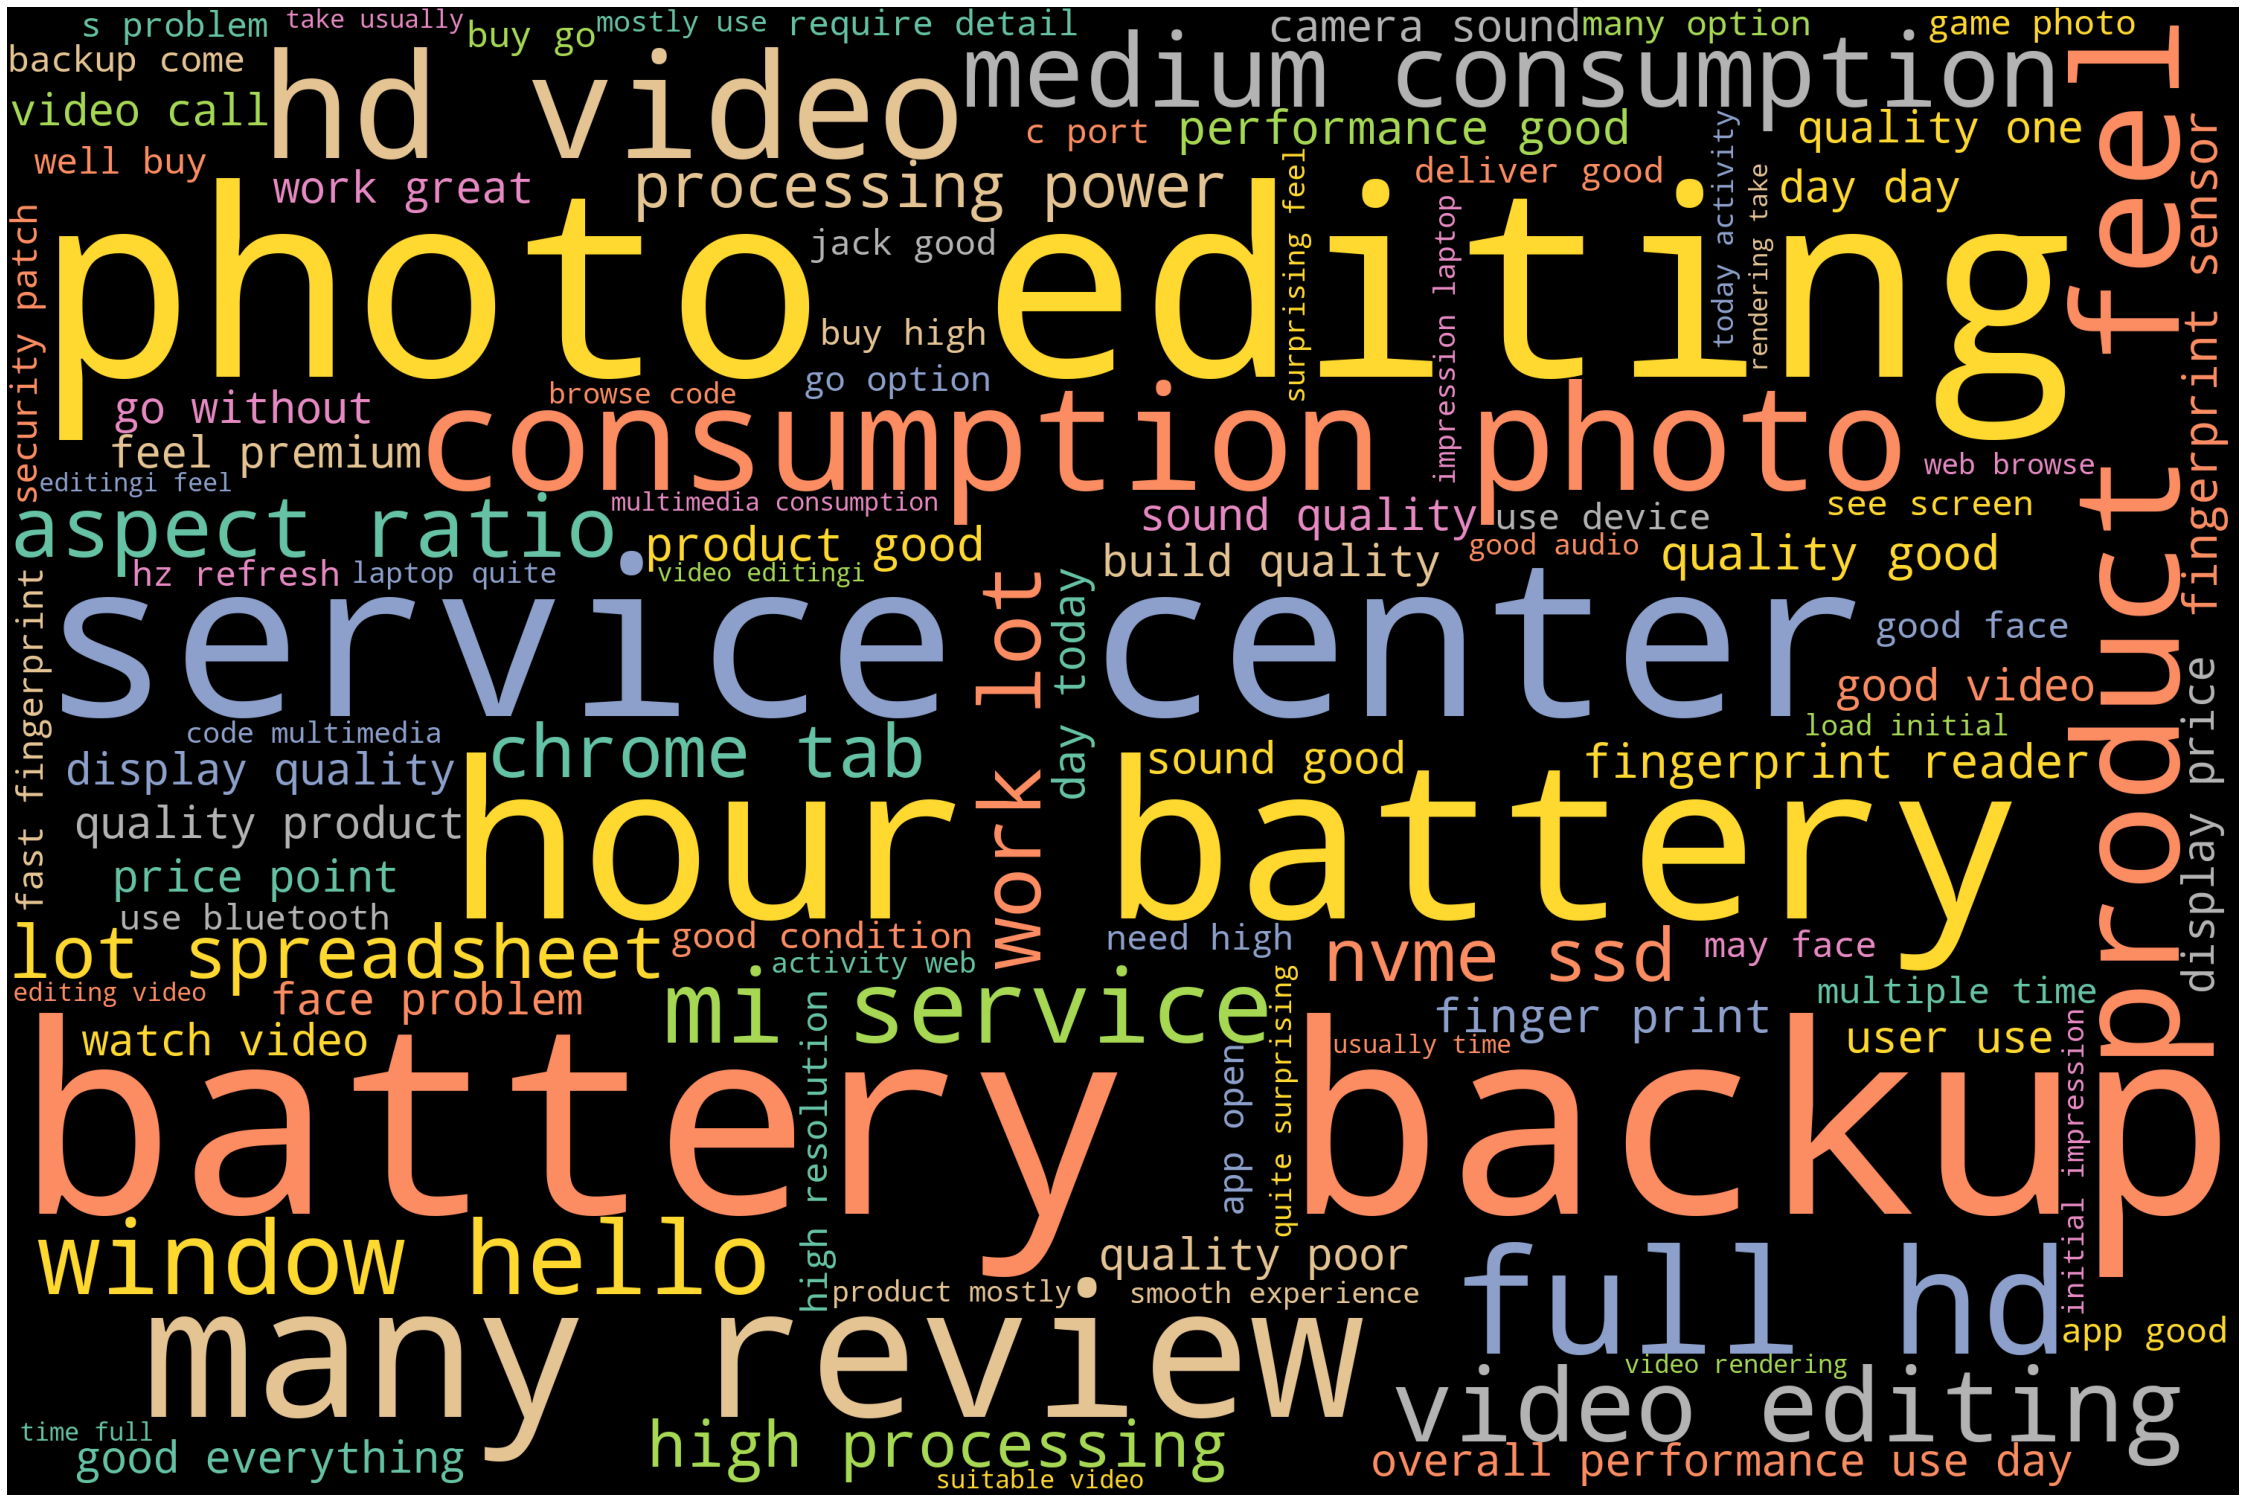

In [113]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_reviews)
# Plot
plot_cloud(wordcloud)

#### Feature Extraction

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [115]:
print(vectorizer.vocabulary_)

{'prosi': 2018, 'use': 2704, 'oneplus': 1742, 'last': 1375, 'month': 1592, 'review': 2183, 'one': 1737, 'plus': 1918, 'phone': 1858, 'positive': 1939, 'well': 2794, 'atleast': 148, 'realme': 2103, 'redmi': 2129, 'vivo': 2752, 'oppo': 1763, 'poco': 1923, 'new': 1658, 'model': 1579, 'mp': 1611, 'rare': 2084, 'macro': 1466, 'lens': 1395, 'include': 1235, 'good': 1040, 'flash': 947, 'light': 1412, 'video': 2743, 'potrait': 1942, 'mode': 1578, 'possible': 1940, 'dual': 742, 'side': 2334, 'camerasit': 389, 'camera': 377, 'quality': 2042, 'surely': 2515, 'start': 2451, 'basic': 222, 'range': 2074, 'really': 2102, 'click': 478, 'photosvideography': 1889, 'also': 75, 'clear': 476, 'goodi': 1060, 'rate': 2085, 'audio': 155, 'streao': 2470, 'speaker': 2422, 'sound': 2418, 'produce': 1993, 'intense': 1268, 'give': 1028, 'oxygen': 1806, 'touch': 2615, 'smooth': 2380, 'doesnot': 725, 'generate': 1012, 'heat': 1149, 'though': 2580, 'fast': 880, 'continuously': 557, 'play': 1909, 'game': 994, 'process

In [116]:
print(vectorizer.get_feature_names()[100:200])
print(X.toarray()[100:200])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['angle', 'animation', 'annoy', 'annoying', 'another', 'ans', 'answer', 'antutu', 'anybody', 'anyone', 'anything', 'anywhen', 'aod', 'apart', 'aperture', 'aperturethe', 'apex', 'app', 'apparent', 'appear', 'appearance', 'appearanceoverall', 'apple', 'application', 'apply', 'appoint', 'appointment', 'apprehension', 'appropriate', 'approximately', 'apps', 'apt', 'arch', 'area', 'arepro', 'arethe', 'around', 'artificial', 'aside', 'ask', 'aspect', 'aspectoccasion', 'asphalt', 'assemble', 'assist', 'assistance', 'associate', 'ati', 'atleast', 'attache', 'attention', 'attitude', 'attract', 'attractionbattery', 'attractive', 'audio', 'august', 'augusttook', 'authorize', 'auto', 'automatic', 'automatically', 'automaticallyone', 'autoslim', 'available', 'avarageperformance', 'average', 'averagebattery', 'averageconclusion', 'averagedesign', 'averagefast', 'averagehowever', 'averageoverall', 'averageslow', 'averagetouch', 'avg', 'avgbattery', 'avoid', 'away', 'awayoverall', 'awesome', 'awesomeb

In [117]:
print(X.toarray().shape)

(612684, 2935)


#### Let's see how can bigrams and trigrams can be included here

In [118]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(review_df)

In [119]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['and', 'and other', 'and the', 'apps', 'are', 'as', 'at', 'backup', 'battery', 'battery backup', 'be', 'build', 'but', 'can', 'could', 'day', 'device', 'display', 'does', 'dont', 'editing', 'feel', 'few', 'for', 'games', 'go', 'good', 'great', 'has', 'have', 'high', 'hours', 'if', 'if you', 'in', 'is', 'is good', 'is not', 'it', 'it is', 'its', 'just', 'laptop', 'like', 'lot', 'lot of', 'many', 'media', 'mi', 'more', 'my', 'no', 'not', 'of', 'of the', 'on', 'on the', 'or', 'other', 'photo', 'photo editing', 'processor', 'product', 'quality', 'quite', 'ram', 'resolution', 'screen', 'smooth', 'so', 'speakers', 'suitable', 'suitable for', 'thanks', 'thanks to', 'that', 'the', 'the display', 'the laptop', 'this', 'this laptop', 'to', 'to use', 'trackpad', 'up', 'use', 'using', 'very', 'video', 'was', 'what', 'who', 'will', 'windows', 'with', 'with the', 'work', 'you', 'you can', 'your']
[[12  0  0 ...  3  1  0]
 [10  0  0 ...  1  0  1]
 [ 1  0  0 ...  1  0  0]
 ...
 [ 3  0  0 ...  0  0  0

#### TFidf vectorizer

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(review_df)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['absolutely', 'all', 'all the', 'along', 'along with', 'already', 'also', 'also not', 'although', 'am', 'amazon', 'an', 'and', 'and it', 'and its', 'and other', 'and other apps', 'and the', 'and you', 'any', 'apps', 'are', 'are very', 'as', 'as well', 'aspect', 'aspect ratio', 'at', 'at this', 'at this price', 'audio', 'available', 'backup', 'battery', 'battery backup', 'be', 'be loaded', 'beautiful', 'because', 'been', 'being', 'below', 'best', 'better', 'bios', 'bios is', 'bluetooth', 'bought', 'browsing', 'build', 'build quality', 'but', 'but if', 'but if you', 'but in', 'but its', 'but not', 'button', 'buy', 'buy it', 'buying', 'by', 'calls', 'calls and', 'camera', 'can', 'can be', 'can buy', 'can go', 'can go for', 'cannot', 'cant', 'card', 'case', 'center', 'chrome', 'chrome tabs', 'clarity', 'clicks', 'coding', 'comes', 'comfortable', 'consumptions', 'consumptions photo', 'consumptions photo editing', 'could', 'could be', 'could have', 'could not', 'could not be', 'course', 'da

### Fetching sentiments

In [69]:
new_review_df

Review  numerics
0     prosi am using oneplus from last few months an...         0
1     ive purchased the  version of this phone which...         2
2     waw this is good mobile is under  i have purch...         0
3     all are good in this phone but jio true  netwo...         0
4                 phone is good and camera is excellent         0
...                                                 ...       ...
9142  the screen is absolutely gorgeous for media co...         2
9143  bios is not good you will face problems in vir...         0
9144  the laptop is class apart good aluminum build ...         1
9145                          very nice laptopread more         0
9146  i just received this laptop earlier today got ...         2

[9075 rows x 2 columns]

In [70]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [73]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
new_review_df['cleaned_review'] = np.vectorize(remove_pattern)(new_review_df['Review'], "@[\w]*")
new_review_df.drop(['numerics'],inplace=True, axis=1)
new_review_df.head(10)

Review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                                      cleaned_review  
0  prosi am using oneplus from last few months an...  
1  ive purchased the  version of this phone which...  
2  waw this is good mobile is under  i have purch...  
3  all are good in this phone but jio true  netwo...  
4              phone is good and camera is excellent  
5                good features in low price segments  
6  battery back up is good sleek and light weight...  
7                                i love this product  
8                                          its goood  
9  it was great product by oneplus in this price ...

In [74]:
### Removing tweet with empty text
new_review_df = new_review_df[new_review_df['cleaned_review']!='']
new_review_df.head(10)

Review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                                      cleaned_review  
0  prosi am using oneplus from last few months an...  
1  ive purchased the  version of this phone which...  
2  waw this is good mobile is under  i have purch...  
3  all are good in this phone but jio true  netwo...  
4              phone is good and camera is excellent  
5                good features in low price segments  
6  battery back up is good sleek and light weight...  
7                                i love this product  
8                                          its goood  
9  it was great product by oneplus in this price ...

In [75]:
#### Dropping Duplicate rows
new_review_df.drop_duplicates(subset=['cleaned_review'], keep=False)
new_review_df.head(10)

Review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                                      cleaned_review  
0  prosi am using oneplus from last few months an...  
1  ive purchased the  version of this phone which...  
2  waw this is good mobile is under  i have purch...  
3  all are good in this phone but jio true  netwo...  
4              phone is good and camera is excellent  
5                good features in low price segments  
6  battery back up is good sleek and light weight...  
7                                i love this product  
8                                          its goood  
9  it was great product by oneplus in this price ...

In [76]:
#### Resetting index
new_review_df = new_review_df.reset_index(drop=True)
new_review_df.head(10)

Review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                                      cleaned_review  
0  prosi am using oneplus from last few months an...  
1  ive purchased the  version of this phone which...  
2  waw this is good mobile is under  i have purch...  
3  all are good in this phone but jio true  netwo...  
4              phone is good and camera is excellent  
5                good features in low price segments  
6  battery back up is good sleek and light weight...  
7                                i love this product  
8                                          its goood  
9  it was great product by oneplus in this price ...

In [77]:
### Removing punctuations, Numbers and special characters

In [78]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [79]:
new_review_df['cleaned_review'] = new_review_df['cleaned_review'].apply(lambda x: clean_text(x))
new_review_df.head(10)

Review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                                      cleaned_review  
0  prosi am using oneplus from last few months an...  
1  ive purchased the  version of this phone which...  
2  waw this is good mobile is under  i have purch...  
3  all are good in this phone but jio true  netwo...  
4              phone is good and camera is excellent  
5                good features in low price segments  
6  battery back up is good sleek and light weight...  
7                                i love this product  
8                                          its goood  
9  it was great product by oneplus in this price ...

In [80]:
### Removing stop words
stopwords_set = set(my_stop_words)
removedstopword_review = []

for index, row in new_review_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.cleaned_review.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    removedstopword_review.append(' '.join(words_without_stopwords))
    
new_review_df['absolute_cleaned_review'] = removedstopword_review
#tweets.drop(['tokenizedtweets'],inplace=True,axis=1)
new_review_df.head(10)


Review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                                      cleaned_review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                             absolute_cleaned_review  
0  prosi using oneplus last months review one plu...  
1  ive purchased version phone comes extendable g...  
2  waw good mobile purchased fully satisfied feat...  
3  good phone jio true network doesnt support wor...  
4                        phone good camera excellent  
5                   good features low price segments  
6  battery back good sleek light weight carry cam...  
7                                       love product  
8                                              goood  
9  great product oneplus price point camera quali...

In [82]:
### Tokenization
tokenized_review = new_review_df['absolute_cleaned_review'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [prosi, using, oneplus, last, months, review, ...
1    [ive, purchased, version, phone, comes, extend...
2    [waw, good, mobile, purchased, fully, satisfie...
3    [good, phone, jio, true, network, doesnt, supp...
4                     [phone, good, camera, excellent]
5               [good, features, low, price, segments]
6    [battery, back, good, sleek, light, weight, ca...
7                                      [love, product]
8                                              [goood]
9    [great, product, oneplus, price, point, camera...
Name: absolute_cleaned_review, dtype: object

In [83]:
### Lemmatizer
nltk.download('wordnet')
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [prosi, using, oneplus, last, month, review, o...
1    [ive, purchased, version, phone, come, extenda...
2    [waw, good, mobile, purchased, fully, satisfie...
3    [good, phone, jio, true, network, doesnt, supp...
4                     [phone, good, camera, excellent]
5                 [good, feature, low, price, segment]
6    [battery, back, good, sleek, light, weight, ca...
7                                      [love, product]
8                                              [goood]
9    [great, product, oneplus, price, point, camera...
Name: absolute_cleaned_review, dtype: object

In [84]:
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

new_review_df['absolute_cleaned_review'] = tokenized_review
new_review_df.head(10)

Review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                                      cleaned_review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   
5                good features in low price segments   
6  battery back up is good sleek and light weight...   
7                                i love this product   
8                                          its goood   
9  it was great product by oneplus in this price ...   

                             absolute_cleaned_review  
0  prosi using oneplus last month review one plus...  
1  ive purchased version phone come extendable gb...  
2  waw good mobile purchased fully satisfied feat...  
3  good phone jio true network doesnt support wor...  
4                        phone good camera excellent  
5                     good feature low price segment  
6  battery back good sleek light weight carry cam...  
7                                       love product  
8                                              goood  
9  great product oneplus price point camera quali...

In [89]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [94]:
#nltk.download('vader_lexicon')
sentiments_using_SIA = new_review_df.absolute_cleaned_review.apply(lambda review : fetch_sentiment_using_SIA(review))
pd.DataFrame(sentiments_using_SIA.value_counts())

absolute_cleaned_review
pos                     8036
neg                     1039

In [87]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(new_review_df.absolute_cleaned_review[3])

{'neg': 0.162, 'neu': 0.43, 'pos': 0.408, 'compound': 0.5334}

In [96]:
#### Visualization of Positive and negative sentiments

In [95]:
new_review_df['sentiment'] = sentiments_using_SIA
new_review_df.head()

Review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   

                                      cleaned_review  \
0  prosi am using oneplus from last few months an...   
1  ive purchased the  version of this phone which...   
2  waw this is good mobile is under  i have purch...   
3  all are good in this phone but jio true  netwo...   
4              phone is good and camera is excellent   

                             absolute_cleaned_review sentiment  
0  prosi using oneplus last month review one plus...       pos  
1  ive purchased version phone come extendable gb...       pos  
2  waw good mobile purchased fully satisfied feat...       pos  
3  good phone jio true network doesnt support wor...       pos  
4                        phone good camera excellent       pos

In [97]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

### Positive Sentiments

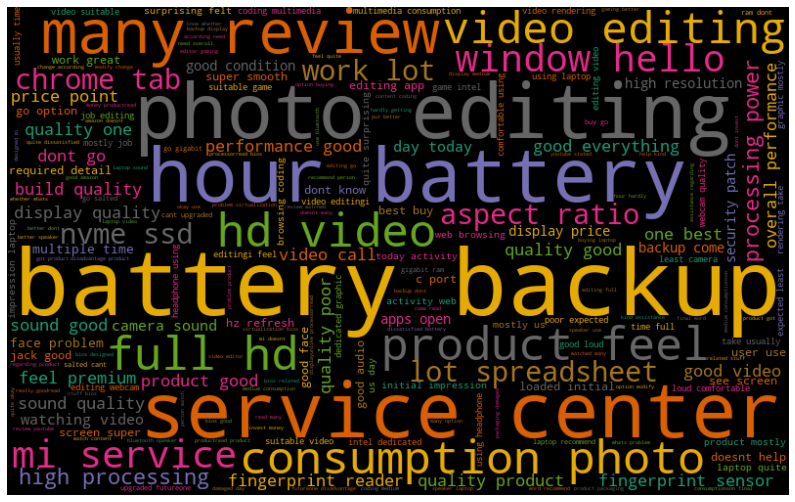

In [99]:
all_words = ' '.join([text for text in new_review_df['absolute_cleaned_review'][new_review_df.sentiment == 'pos']])
generate_wordcloud(all_words)

### Negative sentiments

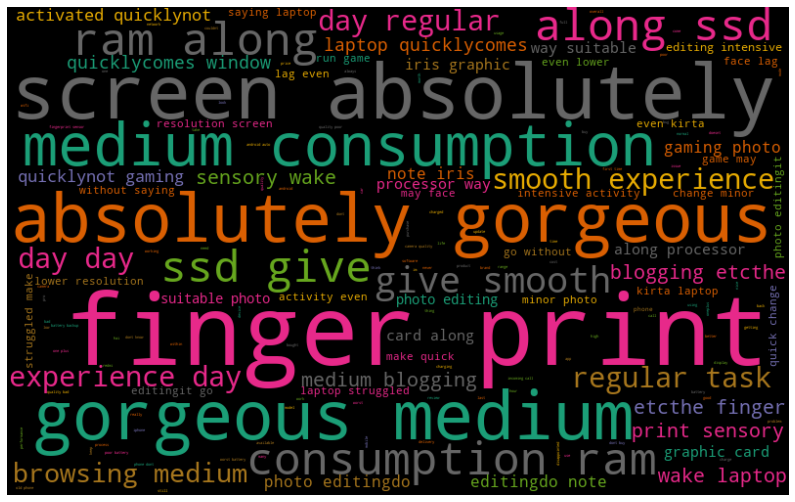

In [100]:
all_words = ' '.join([text for text in new_review_df['absolute_cleaned_review'][new_review_df.sentiment == 'neg']])
generate_wordcloud(all_words)